## 1- Preprocessing 

In [143]:
# Importing Libraries
import pandas as pd
import matplotlib as mp
import seaborn as sb

In [144]:
data = pd.read_csv("titanic-passengers.csv", sep=";")
new_data = pd.DataFrame.copy(data)

# Displaying the first five rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [145]:
# concise summary of a DataFrame.
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [146]:
# Showing descriptive statistics
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,2,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,No,NaN,"Collander, Mr. Erik Gustaf",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,549,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,NaN,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,NaN,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,NaN,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,NaN,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,NaN,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,NaN,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [147]:
# Changing survived and Sex columns from categorical to numerical
# for survived: yes = 1, no = 0
# for Sex: male = 1, female = 0
new_data["Survived"].replace({"Yes":1, "No":0}, inplace=True)
new_data["Sex"].replace({"male":1, "female":0}, inplace=True)

# One-hot-Encoding the Embarked column
new_data = pd.get_dummies(new_data, columns=["Embarked"])
# pd.concat([new_data, dummies], axis=1)
# new_data.drop(["Embarked"], axis=1)
new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,NaN,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,F G73,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,NaN,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,NaN,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,B71,0,0,1


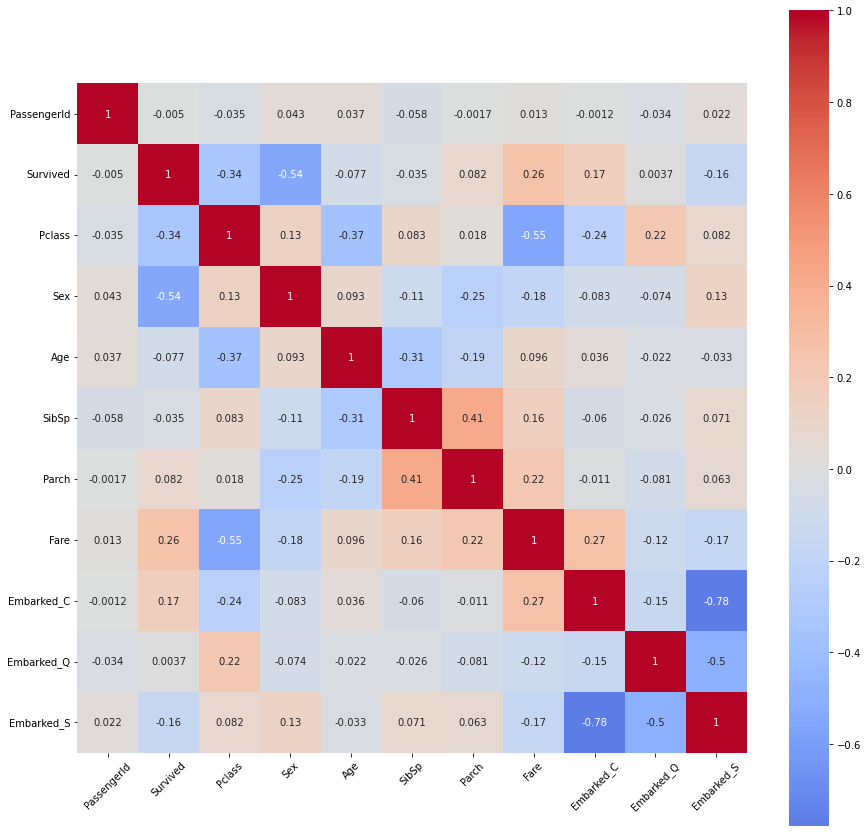

In [148]:
# Finding correlations between features and outcome
def dataCorr(data):
    data_corr = data.corr()
    mp.pyplot.subplots(figsize=(15, 15))
    dataplot = sb.heatmap(data_corr, annot=True, cmap="coolwarm", center=0, square=True)
    mp.pyplot.xticks(rotation = 45)
    mp.pyplot.show()
    
dataCorr(new_data)

In [149]:
# Finding missing values
new_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [150]:
# Removed columns with non-NaN values less than 700 due to their lack of importance
new_data.dropna(how="any", thresh=700, axis=1, inplace=True)

new_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13.0000,0,0,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7.6500,0,0,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7.8542,0,0,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21.0750,0,0,1
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52.0000,0,0,1


## 2- Visualisation Phase

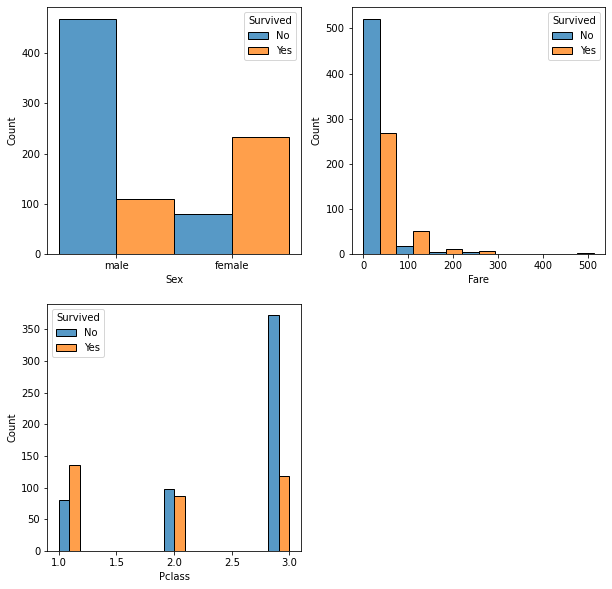

In [151]:
# ["Sex", "Fare", "Pclass", "Embarked_C", "Embarked_Q", "Embarked_S"]

mp.pyplot.subplots(figsize=(10, 10))
mp.pyplot.subplot(2, 2, 1)
sb.histplot(data = data, x = "Sex", hue = "Survived", multiple="dodge")
mp.pyplot.subplot(2, 2, 2)
sb.histplot(data = data, x = "Fare", hue = "Survived", multiple="dodge", bins = 7)
mp.pyplot.subplot(2, 2, 3)
sb.histplot(data = data, x = "Pclass", hue = "Survived", multiple="dodge")
mp.pyplot.show()

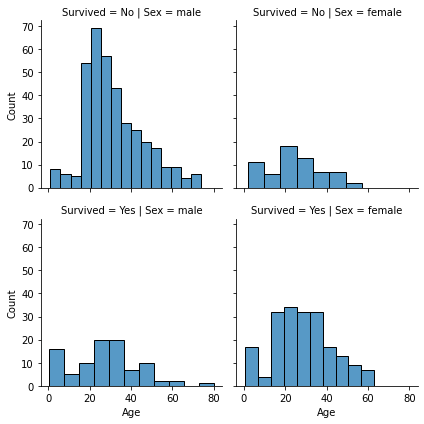

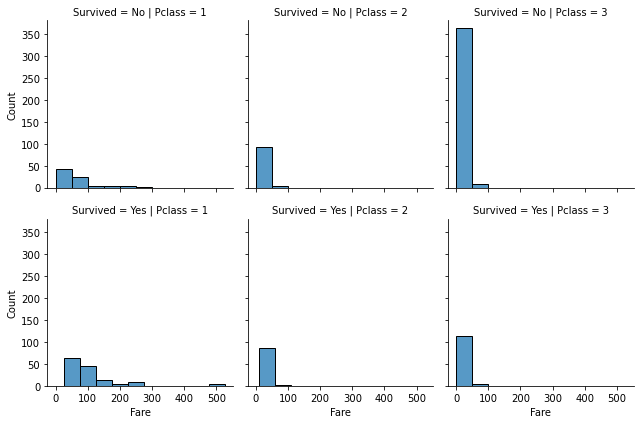

In [152]:
grid = sb.FacetGrid(data, col="Sex", row="Survived")
grid.map(sb.histplot, "Age")

grid = sb.FacetGrid(data, col="Pclass", row="Survived", legend_out=True)
grid.map(sb.histplot, "Fare", binwidth = 50)



#### 2.1- Observation
##### from the FacetGrids:
- The lower the fare, the more likely the person was on a lower Pclass
  - More people survived than died from Pclass 1
  - the survived to died ratio were very close to the ones in Pclass 2
  - Pclass 3 had the most casualties
- Most passengers were between the age 20 and 40
  - More Males died than Females
  - More Females survived than Males

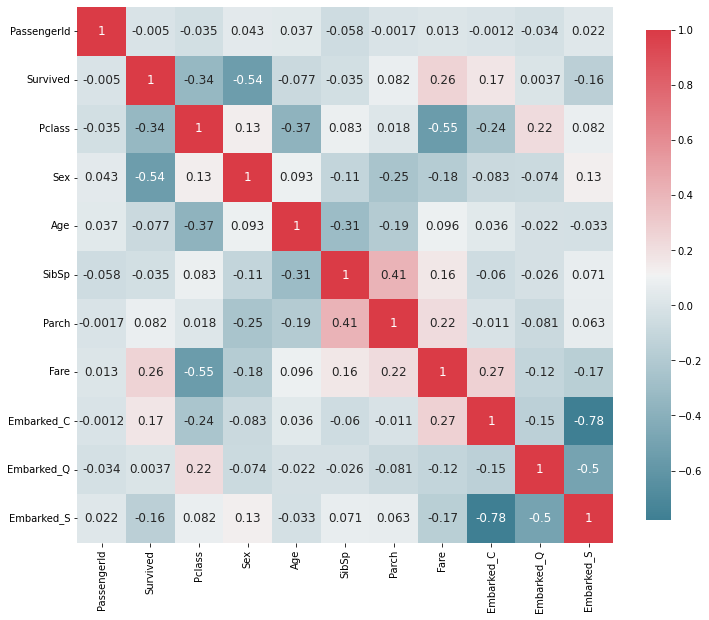

In [153]:
def plot_correlation_map( df ):
    corr = df.corr()
    s , ax = mp.pyplot.subplots( figsize =( 12 , 10 ) )
    cmap = sb.diverging_palette( 220 , 10 , as_cmap = True )
    s = sb.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
    
plot_correlation_map(new_data)

#### 2.3- Observation
##### from the correlation graph:
- The strongest relationships with survival are: Pclass, Sex, and Fare
  - since Pclass 1 is the highest class and Pclass one is the lowest therefore, the lower the Pclass the higher the survival rate, with 34% inverse proportionality
  - For Sex Male = 1 and Female = 0 so since the data shows 54% inverse proportionality that means more Females have survived the accident.
  - The higher the Fare the more likely the passenger was on a higher class therefor higher rate of survival with Fare being 26% proportional to Survival

In [154]:
new_data[["Pclass", "Survived"]].groupby("Pclass", as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [155]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Dr": "Officer",
    "Rev": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir": "Royalty",
    "Lady": "Royalty",
    "the Countess": "Royalty",
    "Dona": "Royalty",
    "Mme": "Miss",
    "Mlle": "Miss",
    "Miss" : "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs": "Mrs",
    "Master": "Master"
}

new_data.rename(columns={"Name": "Title"}, inplace=True)
for index, Row in new_data.iterrows():
    for title in Title_Dictionary:
        if title in Row["Title"]:
            new_data["Title"][index]= Title_Dictionary.get(title)


new_data.head()

C:\Users\ziadh\AppData\Local\Temp\ipykernel_18180\3947585589.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data["Title"][index]= Title_Dictionary.get(title)


,PassengerId,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,Mr,1,28.0,0,0,248740,13.0000,0,0,1
1,76,0,3,Mr,1,25.0,0,0,348123,7.6500,0,0,1
2,641,0,3,Mr,1,20.0,0,0,350050,7.8542,0,0,1
3,568,0,3,Mrs,0,29.0,0,4,349909,21.0750,0,0,1
4,672,0,1,Mr,1,31.0,1,0,F.C. 12750,52.0000,0,0,1


In [160]:
new_data["FamilySize"] = new_data["Parch"] + new_data["SibSp"]
new_data.drop(columns=["SibSp", "Parch"], inplace=True)

new_data.head()

,PassengerId,Survived,Pclass,Title,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,343,0,2,Mr,1,28.0,248740,13.0000,0,0,1,0
1,76,0,3,Mr,1,25.0,348123,7.6500,0,0,1,0
2,641,0,3,Mr,1,20.0,350050,7.8542,0,0,1,0
3,568,0,3,Mrs,0,29.0,349909,21.0750,0,0,1,4
4,672,0,1,Mr,1,31.0,F.C. 12750,52.0000,0,0,1,1


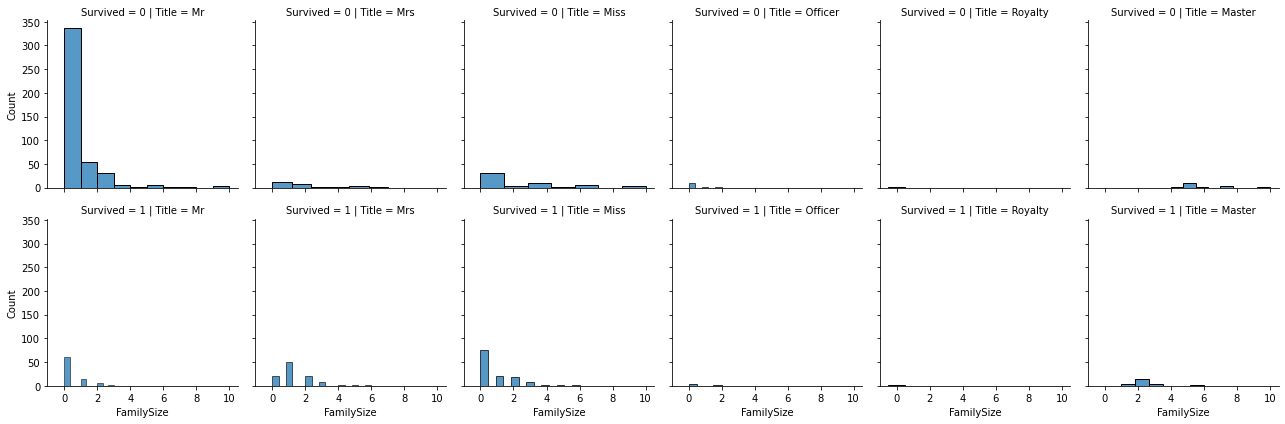

In [162]:
grid = sb.FacetGrid(new_data, col="Title", row="Survived")
grid.map(sb.histplot, "FamilySize")

In [163]:
new_data = pd.get_dummies(new_data, columns=["Title"])

new_data.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,343,0,2,1,28.0,248740,13.0000,0,0,1,0,0,0,1,0,0,0
1,76,0,3,1,25.0,348123,7.6500,0,0,1,0,0,0,1,0,0,0
2,641,0,3,1,20.0,350050,7.8542,0,0,1,0,0,0,1,0,0,0
3,568,0,3,0,29.0,349909,21.0750,0,0,1,4,0,0,0,1,0,0
4,672,0,1,1,31.0,F.C. 12750,52.0000,0,0,1,1,0,0,1,0,0,0


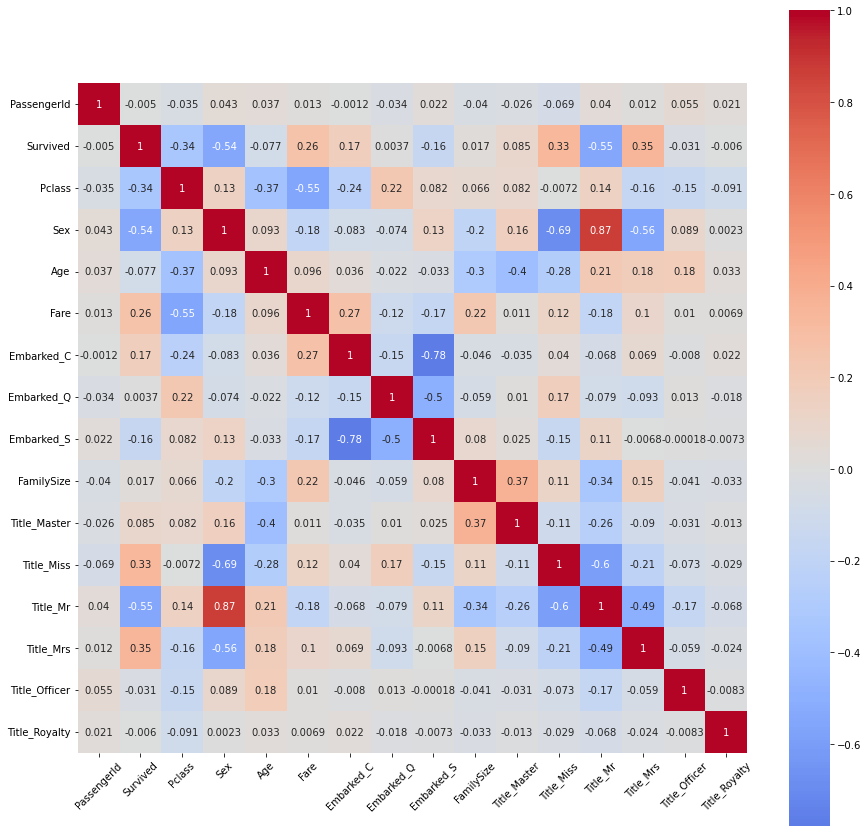

In [164]:
dataCorr(new_data)